# MOVIE RECOMMENDATION SYSTEM

### Abhishek Singh Pawar (Team Leader & Programmer)
### Kishore (Data Wrangling and Visualization)
### Dhruv Agarwal (Data Visualization using Tableau)
### Abhishek Jain (Prediction Algorithm and Code Optimization)

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

In [16]:
#Establishing connection with MySQL Server
userName='abhishek'
password='admin@123'
host='localhost'
databaseName='Movie_Recommendation_DB'
engine=create_engine("mysql+pymysql://{user}:{password}@{host}/{db}".format(user=userName,password=password,host=host,db=databaseName))

In [17]:
#Join two required tables to create a collective Movie Dataset
queryToJoin = 'SELECT * FROM movie_details m1 INNER JOIN movie_title m2 ON m1.show_id=m2.show_id'
finalData = pd.read_sql(queryToJoin, engine)
finalData

,index,show_id,type,director,listed_in,index,show_id,title,cast,country,date_added,release_year,rating,duration,description
0,0,s1,TV Show,None,"International TV Shows, TV Dramas, TV Sci-Fi &...",0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,1,s2,Movie,Jorge Michel Grau,"Dramas, International Movies",1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,Gilbert Chan,"Horror Movies, International Movies",2,s3,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"When an army recruit is found dead, his fellow..."
3,3,s4,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",3,s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,Robert Luketic,Dramas,4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7727,s7728,Movie,Cathy Garcia-Molina,"Comedies, Dramas, International Movies",7727,s7728,You Changed My Life,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,27-Feb-19,2009,TV-PG,116 min,Laida and Miggy think they've found perfect ha...
7783,7733,s7734,TV Show,None,"International TV Shows, Romantic TV Shows, TV ...",7733,s7734,You're My Destiny,"Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, ...",Taiwan,1-Aug-16,2008,TV-MA,1 Season,A young woman's romantic cruise ends in a twis...
7784,7745,s7746,Movie,Raja Gosnell,"Children & Family Movies, Comedies",7745,s7746,"Yours, Mine and Ours","Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,20-Nov-19,2005,PG,88 min,When a father of eight and a mother of 10 prep...
7785,7758,s7759,Movie,Kevin Smith,"Comedies, Independent Movies, Romantic Movies",7758,s7759,Zack and Miri Make a Porno,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,1-Oct-18,2008,R,101 min,Zack and Miri make and star in an adult film t...


In [ ]:
finalData.to_excel("C:/Users/abhi1/ABHISHEK'S EVERYTHING/STUDY/DAM PROJECT/DATA/MovieFinalData.xlsx")

In [3]:
dataForAnalysis = pd.read_excel("C:/Users/abhi1/ABHISHEK'S EVERYTHING/STUDY/DAM PROJECT/DATA/MovieFinalData.xlsx")

In [4]:
#View the head of the date needs to be analyzed
dataForAnalysis.head()

,Unnamed: 0,index,show_id,type,director,listed_in,index.1,show_id.1,title,cast,country,date_added,release_year,rating,duration,description
0,0,0,s1,TV Show,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,1,1,s2,Movie,Jorge Michel Grau,"Dramas, International Movies",1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...
2,2,2,s3,Movie,Gilbert Chan,"Horror Movies, International Movies",2,s3,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"When an army recruit is found dead, his fellow..."
3,3,3,s4,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",3,s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi..."
4,4,4,s5,Movie,Robert Luketic,Dramas,4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,A brilliant group of students become card-coun...


# DATA CLEANING

In [5]:
#Drop the duplicate columns created from Join
dataForAnalysis.drop(['index.1','show_id.1'],axis=1,inplace=True)

In [6]:
dataForAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    7787 non-null   int64 
 1   index         7787 non-null   int64 
 2   show_id       7787 non-null   object
 3   type          7787 non-null   object
 4   director      5398 non-null   object
 5   listed_in     7787 non-null   object
 6   title         7787 non-null   object
 7   cast          7069 non-null   object
 8   country       7280 non-null   object
 9   date_added    7777 non-null   object
 10  release_year  7787 non-null   int64 
 11  rating        7780 non-null   object
 12  duration      7787 non-null   object
 13  description   7787 non-null   object
dtypes: int64(3), object(11)
memory usage: 851.8+ KB


In [7]:
#Remove all the tuples(rows) having null as a value
dataForAnalysis.dropna(subset=['director','cast', 'country','date_added', 'rating'], axis=0, inplace=True)

In [8]:
dataForAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4808 non-null   int64 
 1   index         4808 non-null   int64 
 2   show_id       4808 non-null   object
 3   type          4808 non-null   object
 4   director      4808 non-null   object
 5   listed_in     4808 non-null   object
 6   title         4808 non-null   object
 7   cast          4808 non-null   object
 8   country       4808 non-null   object
 9   date_added    4808 non-null   object
 10  release_year  4808 non-null   int64 
 11  rating        4808 non-null   object
 12  duration      4808 non-null   object
 13  description   4808 non-null   object
dtypes: int64(3), object(11)
memory usage: 563.4+ KB


In [9]:
#Making the Column index as the unique identifier(index) of the dataframe
dataForAnalysis.set_index('index',inplace=True)

In [10]:
#Removing Unwanted Columns from the DataFrame
dataForAnalysis.drop(['Unnamed: 0', 'show_id','description'],axis=1, inplace=True)

In [11]:
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration
index,,,,,,,,,,
1,Movie,Jorge Michel Grau,"Dramas, International Movies",7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min
2,Movie,Gilbert Chan,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min
3,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min
4,Movie,Robert Luketic,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min
5,TV Show,Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries",46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,2016,TV-MA,1 Season


In [12]:
#Removing Special characters and replacing them with ASCII characters
import unidecode
dataForAnalysis['cast'] = dataForAnalysis['cast'].apply(lambda x : unidecode.unidecode(x))
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration
index,,,,,,,,,,
1,Movie,Jorge Michel Grau,"Dramas, International Movies",7:19,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min
2,Movie,Gilbert Chan,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min
3,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min
4,Movie,Robert Luketic,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min
5,TV Show,Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries",46,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,2016,TV-MA,1 Season


In [13]:
#Format the date_added column in a proper way
dataForAnalysis['date_added'] = dataForAnalysis['date_added'].apply(lambda x : '20'+x[-2:])
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration
index,,,,,,,,,,
1,Movie,Jorge Michel Grau,"Dramas, International Movies",7:19,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min
2,Movie,Gilbert Chan,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min
3,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min
4,Movie,Robert Luketic,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min
5,TV Show,Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries",46,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season


In [14]:
#Create a new column show_age using the date_added and release_year column
from datetime import datetime
currentYear = datetime.today().strftime("%Y")
dataForAnalysis['show_age'] = int(currentYear)-(dataForAnalysis['date_added'].astype(int))
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
index,,,,,,,,,,,
1,Movie,Jorge Michel Grau,"Dramas, International Movies",7:19,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,5
2,Movie,Gilbert Chan,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,3
3,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,4
4,Movie,Robert Luketic,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,1
5,TV Show,Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries",46,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,4


In [15]:
#Change the date_added Column data type
dataForAnalysis['date_added'] = dataForAnalysis['date_added'].astype('int64')

In [16]:
#final data After all the cleaning
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
index,,,,,,,,,,,
1,Movie,Jorge Michel Grau,"Dramas, International Movies",7:19,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,5
2,Movie,Gilbert Chan,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,3
3,Movie,Shane Acker,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,4
4,Movie,Robert Luketic,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,1
5,TV Show,Serdar Akar,"International TV Shows, TV Dramas, TV Mysteries",46,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,4


# DATA VISUALIZATION

Text(0, 0.5, 'Count')

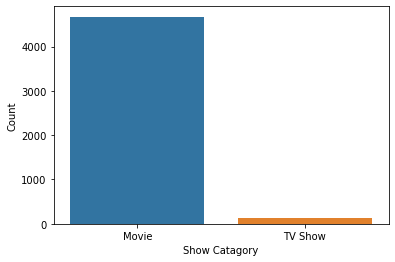

In [17]:
# Comparing the counts of Movies and TV shows through Bar Chart
sns.countplot(x='type', data=dataForAnalysis)
plt.xlabel('Show Catagory')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

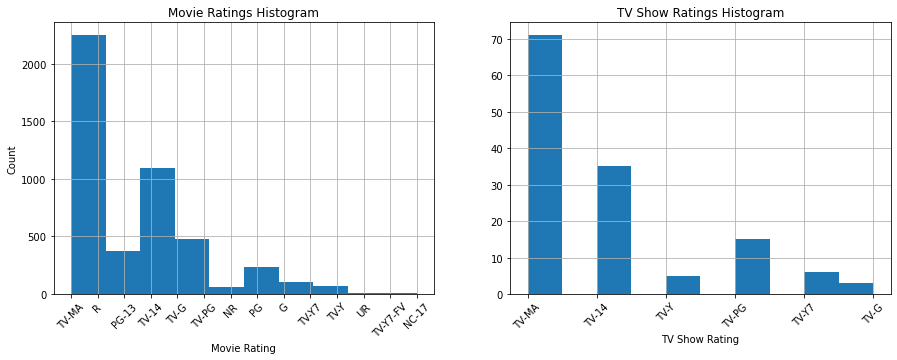

In [18]:
#Plot the Counts of Movie and TV Show as per the Rating
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
movieRatings = dataForAnalysis[dataForAnalysis['type']=='Movie']
movieRatings.rating.hist(bins=10)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Movie Ratings Histogram')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
tvShowRatings = dataForAnalysis[dataForAnalysis['type']=='TV Show']
tvShowRatings.rating.hist(bins=10)
plt.xlabel('TV Show Rating')
plt.title('TV Show Ratings Histogram')
plt.xticks(rotation=45)

Text(0.5, 0, 'Type of Show')

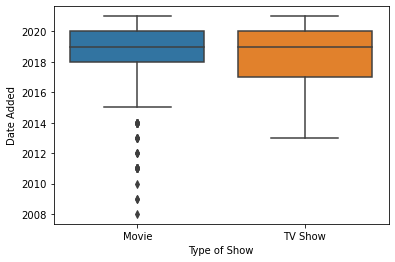

In [19]:
#Analyzing the Distribution of Movies/TV Shows according to the date_added Column
sns.boxplot(x='type', y='date_added', data=dataForAnalysis)
plt.ylabel('Date Added')
plt.xlabel('Type of Show')

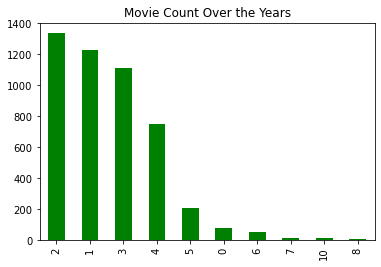

In [20]:
#Plot the show_age column on Bar Chart and Consider only the Top 10 ages
show_ages = dataForAnalysis['show_age'].value_counts().sort_values(ascending=False)[:10]
show_ages.plot(kind='bar', title='Movie Count Over the Years',color='Green')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

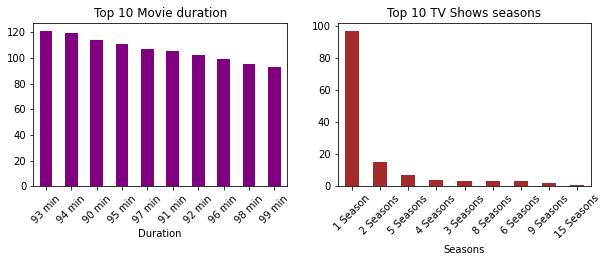

In [21]:
# Plotting Top 10 Movies and TV Shows
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
movies_duration = dataForAnalysis[dataForAnalysis['type'] == "Movie"]
movies_duration = movies_duration['duration'].value_counts().sort_values(ascending=False)[:10]
movies_duration.plot(kind='bar',title='Number of movies over the years',color='purple')
plt.xlabel("Duration")
plt.title("Top 10 Movie duration")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
show_duration = dataForAnalysis[dataForAnalysis['type'] == "TV Show"]
show_duration = show_duration['duration'].value_counts().sort_values(ascending=False)[:10]
show_duration.plot(kind='bar',title='Number of TV Shows over the years',color='brown')
plt.xlabel("Seasons")
plt.title("Top 10 TV Shows seasons")
plt.xticks(rotation = 45)

In [25]:
%%HTML 
<div class='tableauPlaceholder' id='viz1638150861505' style='position: relative'><noscript><a href='#'><img alt='Movie Distribution Country Wise ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MovieDistributionCountryWise&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MovieDistributionCountryWise&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Mo&#47;MovieDistributionCountryWise&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638150861505');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='85%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

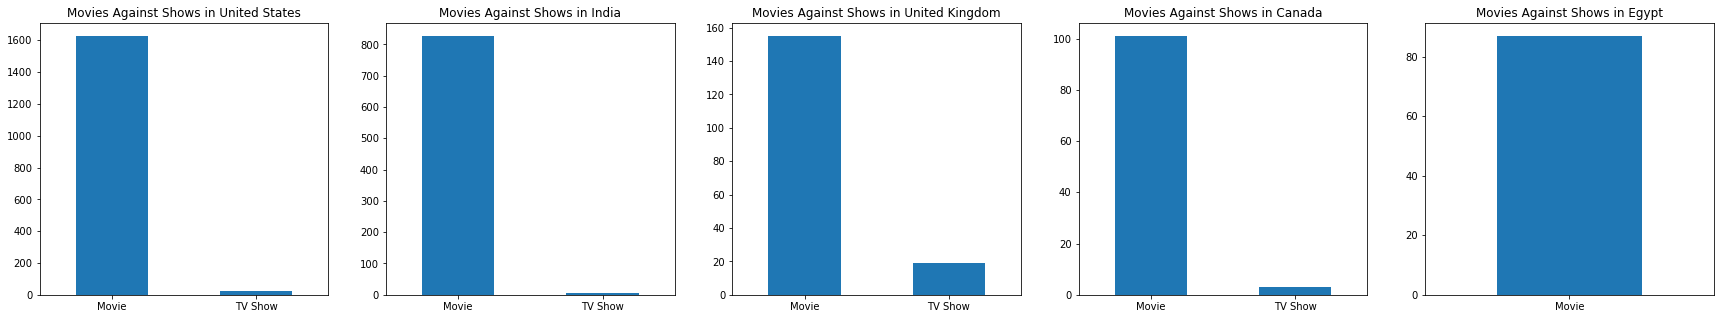

In [26]:
#Plottin Movies Against Shows for Top 5 Countries
plt.figure(figsize=(30,5))
countryWiseCounts = dataForAnalysis.country.value_counts(ascending=False)[:5]

for i in range(len(countryWiseCounts)):
    plt.subplot(1,5,i+1)
    moviesAgainstShows = dataForAnalysis[dataForAnalysis['country'] == countryWiseCounts.index[i]]
    moviesAgainstShows = moviesAgainstShows['type'].value_counts()
    moviesAgainstShows.plot(kind='bar')
    plt.title("Movies Against Shows in {}".format(countryWiseCounts.index[i]))
    plt.xticks(rotation = 360)

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1638152544112' style='position: relative'><noscript><a href='#'><img alt='Genre wise Distribution ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GenrewiseDistribution&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GenrewiseDistribution&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ge&#47;GenrewiseDistribution&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638152544112');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [28]:
%%HTML
<div class='tableauPlaceholder' id='viz1638154311114' style='position: relative'><noscript><a href='#'><img alt='Maximum Releases Per Year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MaximumReleasesPerYear&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MaximumReleasesPerYear&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;MaximumReleasesPerYear&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638154311114');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# MOVIE PREDICTOR BASED ON GIVEN TITLE

In [29]:
singleEntries = ['type', 'rating', 'duration', 'show_age']
multiEntries = ['director', 'listed_in', 'cast', 'country']

#Handling multi Entries Column by splitting them and adding them to as list
for i in multiEntries:
    dataForAnalysis[i] = dataForAnalysis[i].apply(lambda x : x.replace(" ", "").split(","))
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
index,,,,,,,,,,,
1,Movie,[JorgeMichelGrau],"[Dramas, InternationalMovies]",7:19,"[DemianBichir, HectorBonilla, OscarSerrano, Az...",[Mexico],2016,2016,TV-MA,93 min,5
2,Movie,[GilbertChan],"[HorrorMovies, InternationalMovies]",23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018,2011,R,78 min,3
3,Movie,[ShaneAcker],"[Action&Adventure, IndependentMovies, Sci-Fi&F...",9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017,2009,PG-13,80 min,4
4,Movie,[RobertLuketic],[Dramas],21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020,2008,PG-13,123 min,1
5,TV Show,[SerdarAkar],"[InternationalTVShows, TVDramas, TVMysteries]",46,"[ErdalBesikcioglu, YaseminAllen, MelisBirkan, ...",[Turkey],2017,2016,TV-MA,1 Season,4


In [30]:
#Create a Copy of the Data for Prediction
dataForPrediction = dataForAnalysis.copy()

In [31]:
#Making Columns for all the Unique Entries of every column given in the SingleEntries List
for j in singleEntries:
    for i in dataForPrediction[j].unique():
        dataForPrediction[i]=0
dataForPrediction.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,...,2,0,6,8,10,12,7,13,9,11
index,,,,,,,,,,,,,,,,,,,,,
1,Movie,[JorgeMichelGrau],"[Dramas, InternationalMovies]",7:19,"[DemianBichir, HectorBonilla, OscarSerrano, Az...",[Mexico],2016,2016,TV-MA,93 min,...,0,0,0,0,0,0,0,0,0,0
2,Movie,[GilbertChan],"[HorrorMovies, InternationalMovies]",23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018,2011,R,78 min,...,0,0,0,0,0,0,0,0,0,0
3,Movie,[ShaneAcker],"[Action&Adventure, IndependentMovies, Sci-Fi&F...",9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017,2009,PG-13,80 min,...,0,0,0,0,0,0,0,0,0,0
4,Movie,[RobertLuketic],[Dramas],21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020,2008,PG-13,123 min,...,0,0,0,0,0,0,0,0,0,0
5,TV Show,[SerdarAkar],"[InternationalTVShows, TVDramas, TVMysteries]",46,"[ErdalBesikcioglu, YaseminAllen, MelisBirkan, ...",[Turkey],2017,2016,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Assigning the value 1 to the Column True for each row
for i in range(len(dataForPrediction)):
    row = dataForPrediction.index[i]
    for j in singleEntries:
        value = dataForPrediction[j][row]
        dataForPrediction.loc[row,value]=1

In [33]:
#Checking the total number of columns after making respective changes
print(len(dataForPrediction.columns))

236


In [34]:
#For Multi Entries the same operations is done as we did for Single Entries
for i in multiEntries:
    holderList = []
    
    for j in range(len(dataForPrediction[i])):
        row = dataForPrediction.index[j] 
        holderList.append([x.strip() for x in dataForPrediction[i][row]])

    finalcol = [l for m in holderList for l in m]
    finalcol = list(set(finalcol))
    
    for cols in finalcol:
        dataForPrediction[cols] = 0
        
for i in range(len(dataForPrediction)):
    row = dataForAnalysis.index[i] 
    for j in multiEntries:
        for value in dataForPrediction[j][row]: 
            dataForPrediction.loc[row,value] = 1

In [35]:
#Check the Number of Columns again after this processing
len(dataForPrediction.columns)

27154

In [36]:
dataForAnalysis.reset_index(inplace=True) 
dataForAnalysis.drop('index',axis=1,inplace=True)

dataForPrediction.reset_index(inplace=True) 
dataForPrediction.drop('index',axis=1,inplace=True)

In [46]:
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age,cosine_similarity
0,Movie,[JorgeMichelGrau],"[Dramas, InternationalMovies]",7:19,"[DemianBichir, HectorBonilla, OscarSerrano, Az...",[Mexico],2016,2016,TV-MA,93 min,5,0.214286
1,Movie,[GilbertChan],"[HorrorMovies, InternationalMovies]",23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018,2011,R,78 min,3,0.194461
2,Movie,[ShaneAcker],"[Action&Adventure, IndependentMovies, Sci-Fi&F...",9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017,2009,PG-13,80 min,4,0.062994
3,Movie,[RobertLuketic],[Dramas],21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020,2008,PG-13,123 min,1,0.122628
4,TV Show,[SerdarAkar],"[InternationalTVShows, TVDramas, TVMysteries]",46,"[ErdalBesikcioglu, YaseminAllen, MelisBirkan, ...",[Turkey],2017,2016,TV-MA,1 Season,4,0.061314


In [38]:
#dataForPrediction.drop(['date_added','release_year'], axis=1, inplace=True)
dataForPrediction.drop(['date_added', 'release_year','type','director','listed_in','title', 'cast', 'country', 'rating', 'duration', 'show_age'], axis=1, inplace=True)
dataForPrediction.head()

,Movie,TV Show,TV-MA,R,PG-13,TV-14,TV-G,TV-PG,NR,PG,...,Argentina,Chile,Slovakia,Ireland,Mexico,UnitedStates,Slovenia,CzechRepublic,Uruguay,Bermuda
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from numpy import dot
from numpy.linalg import norm
def movieRecommendationSystem(title):
    cossim_values = []
    try:
        row = dataForAnalysis[dataForAnalysis['title'] == title].index[0]
        row = dataForPrediction.index[row]
        A = np.array(dataForPrediction.iloc[row])
        for j in range(len(dataForPrediction)):
            B = np.array(dataForPrediction.iloc[j])
            cosine_Similiarity = dot(A,B)/(norm(A)*norm(B))
            cossim_values.append(cosine_Similiarity)

        dataForAnalysis['cosine_similarity'] = cossim_values
        results = dataForAnalysis.sort_values('cosine_similarity', ascending=False)
        results = results.head(10).iloc[1:,:-1]
        return(results)
    except:
        print("Uh-Oh, the movie is not present in the database. Please try some other movie")

In [40]:
dataForAnalysis.head()

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
0,Movie,[JorgeMichelGrau],"[Dramas, InternationalMovies]",7:19,"[DemianBichir, HectorBonilla, OscarSerrano, Az...",[Mexico],2016,2016,TV-MA,93 min,5
1,Movie,[GilbertChan],"[HorrorMovies, InternationalMovies]",23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018,2011,R,78 min,3
2,Movie,[ShaneAcker],"[Action&Adventure, IndependentMovies, Sci-Fi&F...",9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017,2009,PG-13,80 min,4
3,Movie,[RobertLuketic],[Dramas],21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020,2008,PG-13,123 min,1
4,TV Show,[SerdarAkar],"[InternationalTVShows, TVDramas, TVMysteries]",46,"[ErdalBesikcioglu, YaseminAllen, MelisBirkan, ...",[Turkey],2017,2016,TV-MA,1 Season,4


In [41]:
movieRecommendationSystem("The House Next Door")

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
562,Movie,[AbhayChopra],"[Dramas, InternationalMovies, Thrillers]",Ittefaq,"[SidharthMalhotra, SonakshiSinha, AkshayeKhanna]",[India],2018,2017,TV-MA,105 min,3
4433,Movie,[GirishJoshi],"[HorrorMovies, InternationalMovies, Thrillers]",Ranbhool,"[SubodhBhave, MohanJoshi, VinayApte, UdayTikek...",[India],2018,2010,TV-MA,115 min,3
2512,Movie,[Parthiban],"[Dramas, InternationalMovies, Thrillers]",Oththa Seruppu Size 7,[Parthiban],[India],2019,2019,TV-MA,103 min,2
863,Movie,[B.N.ShajeerSha],"[Comedies, HorrorMovies, InternationalMovies]",Lechmi,"[ParvathyRatheesh, BijuSopanam, SethulekshmiAm...",[India],2018,2017,TV-MA,147 min,3
813,Movie,[RajKumarGupta],"[Comedies, InternationalMovies, Thrillers]",Ghanchakkar,"[EmraanHashmi, VidyaBalan, RajeshSharma, Namit...",[India],2018,2013,TV-MA,129 min,3
2585,Movie,[DavidBruckner],"[HorrorMovies, InternationalMovies, Thrillers]",The Ritual,"[RafeSpall, ArsherAli, RobertJames-Collier, Sa...","[UnitedKingdom, Canada]",2018,2018,TV-MA,95 min,3
1669,Movie,[Mysskin],"[HorrorMovies, InternationalMovies, Thrillers]",Psycho,"[UdhayanidhiStalin, AditiRaoHydari, NithyaMeno...",[India],2020,2020,TV-MA,143 min,1
4358,Movie,[Hong-seonKim],"[Dramas, InternationalMovies, Thrillers]",반드시 잡는다,[BaekYoon-sik],[SouthKorea],2018,2017,TV-MA,110 min,3
1627,Movie,[AnikDatta],"[Dramas, InternationalMovies]",Meghnadbodh Rohoshyo,"[BarunChanda, SabyasachiChakraborty]",[India],2018,2017,TV-MA,150 min,3


In [42]:
movieRecommendationSystem("Volcano")

Uh-Oh, the movie is not present in the database. Please try some other movie


In [43]:
movieRecommendationSystem("Karthik Calling Karthik")

,type,director,listed_in,title,cast,country,date_added,release_year,rating,duration,show_age
2512,Movie,[Parthiban],"[Dramas, InternationalMovies, Thrillers]",Oththa Seruppu Size 7,[Parthiban],[India],2019,2019,TV-MA,103 min,2
4163,Movie,[VinodKapri],"[Dramas, IndependentMovies, InternationalMovies]",Pihu,[PihuMyraVishwakarma],[India],2019,2018,TV-14,90 min,2
3539,Movie,[AnilV.Kumar],"[Dramas, InternationalMovies, Thrillers]",Kucch To Hai,"[TussharKapoor, EshaDeol, Natasha, Jeetendra, ...",[India],2019,2003,TV-14,136 min,2
4248,Movie,[BejoyNambiar],"[Dramas, InternationalMovies, Thrillers]",Wazir,"[AmitabhBachchan, FarhanAkhtar, AditiRaoHydari...",[India],2019,2016,TV-MA,98 min,2
674,Movie,[ReemaKagti],"[Dramas, InternationalMovies, Thrillers]",Talaash,"[AamirKhan, RaniMukerji, KareenaKapoor, Nawazu...",[India],2019,2012,TV-14,140 min,2
646,Movie,[AbhishekKapoor],"[Dramas, InternationalMovies, Music&Musicals]",Rock On!!,"[FarhanAkhtar, ArjunRampal, PurabKohli, LukeKe...",[India],2019,2008,TV-14,139 min,2
4591,Movie,[AbhinayDeo],"[InternationalMovies, Thrillers]",Game,"[AbhishekBachchan, KanganaRanaut, AnupamKher, ...",[India],2019,2011,TV-14,135 min,2
1341,Movie,[SudiptoRoy],"[Dramas, IndependentMovies, InternationalMovies]",Kia and Cosmos,"[RitwikaPal, SwastikaMukherjee, JoySengupta]",[India],2019,2018,TV-14,124 min,2
3005,Movie,[DattaMohanBhandare],"[Dramas, InternationalMovies]",Krutant,"[SuyogRajendraGorhe, SandeepKulkarni, VidyaKar...",[India],2019,2019,TV-14,114 min,2
